## FirstCal Metrics Demo

Here we use the `FirstCal_Metrics` class within `firstcal_metrics.py` to assess the quality of firstcal solutions. Firstcal solutions are stored in `*first.calfits` files that are read on a file-by-file basis. This is only because the `pyuvadata.UVCal` class currently only supports file-by-file reading. 

In [19]:
%matplotlib inline
import numpy as np
import glob
import hera_qm

In [2]:
# get files
files = sorted(glob.glob("../hera_qm/data/*.first.calfits"))

### Example of Good FirstCal Delay Solutions

This is an example where FirstCal solutions are good, which in this case means excluding antenna 81 from the firstcal solutions (b/c its a dead antenna). This is something we exepct the AntMetrics to be able to pick up on, and is therefore a reasonable assumption.

In [3]:
files

['../hera_qm/data/zen.2457678.16694.yy.HH.uvc.good.first.calfits']

In [4]:
# initialize metrics class
FM = hera_qm.firstcal_metrics.FirstCal_Metrics(files[0])

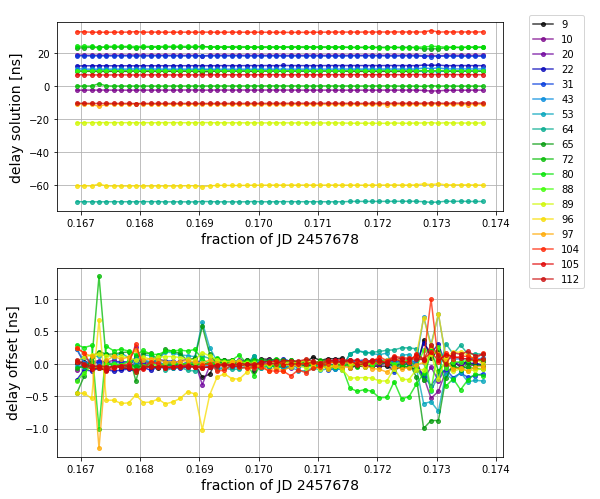

In [20]:
# inspect delays
FM.plot_delays()

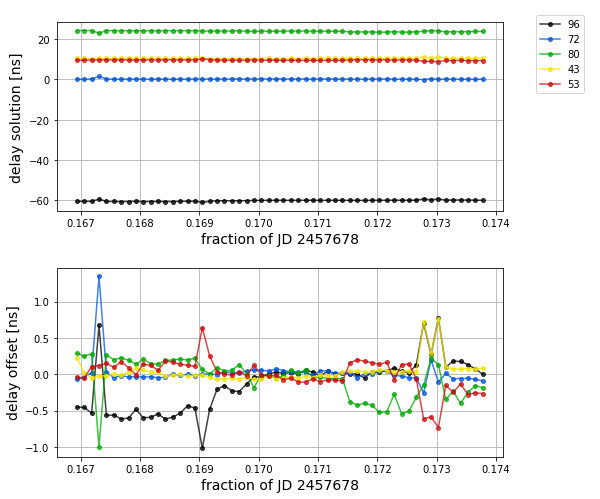

In [21]:
# inspect only a few antennas
FM.plot_delays(ants=[96, 72, 80, 43, 53])

Here we can see the delay solutions are for the most part stable over time, with the exception of a few antennas that show deviation on the ~0.5 ns scale. There are also particular times when solutions for all antennas are considerably worse than the average.

If we want to save this images to file, we can do so as well.

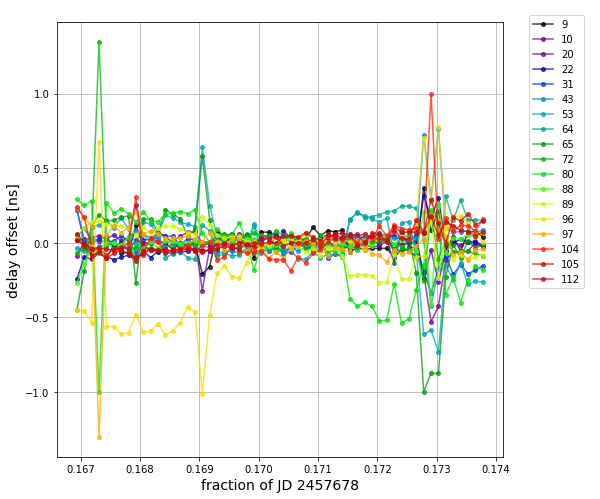

In [22]:
# inspect delays and save to file, and also only plot the delay offsets
FM.plot_delays(plot_type='offset', save=True)

In [11]:
# get png files
png_files = glob.glob("../hera_qm/data/*.png")
png_files

['../hera_qm/data/zen.2457678.16694.yy.HH.uvc.good.first.dlys.png']

Let's plot the standard deviations of the delay solutions per-antenna.

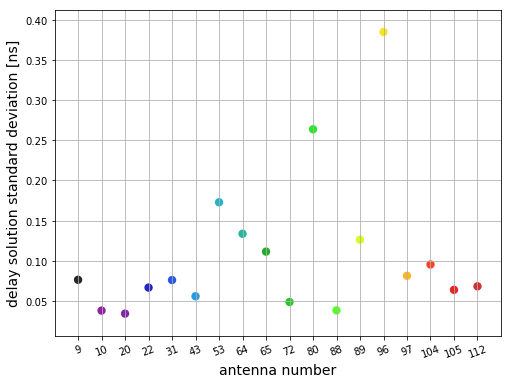

In [23]:
# plot standard deviation of delay solutions
FM.plot_stds()

We can see that all antennas have delay solution stand devs of less than 0.5 ns, which is not bad. It is apparent from this plot that, if we had to eliminate some antennas from the solution, it would first be 96, then perhaps 80. This is also apparent in the zscores.

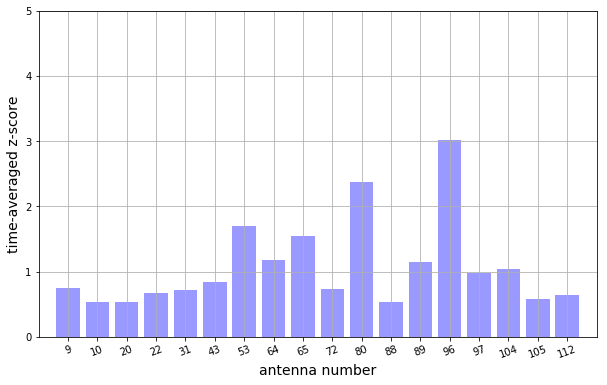

In [24]:
# plot z_scores of delay solutions
FM.plot_zscores(plot_type='time_avg')

Now let's look at some of the quantitative metrics.

In [25]:
FM.run_metrics()

In [17]:
# run metrics
FM.run_metrics(std_cut=0.5)

In [18]:
# full solution is either good or bad based on std_cut in ns
FM.full_sol

'good'

In [20]:
## we can also get a list of bad firstcal solutions per-antenna based on std_cut
FM.bad_ants

[]

We see that, given our delay standard deviation hard bound of 0.5 ns, the solution as a whole is deemed 'good', and none of the antennas are deemed 'bad.' 